In [99]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import pandas as pd
import scipy.stats as stats
from scipy.stats import linregress
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.stats import zscore
import json

In [41]:
block_hash = "0000000000000000000071bf7ab7417bf6f8fc235d6ef2c1fc98bb80643e3732"
print(f"The Block Hash: {block_hash}")

The Block Hash: 0000000000000000000071bf7ab7417bf6f8fc235d6ef2c1fc98bb80643e3732


In [4]:
# JSON data
url = f"https://blockchain.info/rawblock/{block_hash}"
print(f"The Url: {url}")

The Url: https://blockchain.info/rawblock/0000000000000000000071bf7ab7417bf6f8fc235d6ef2c1fc98bb80643e3732


In [6]:
response = requests.get(url)
print(f"Response: {response}")

Response: <Response [200]>


In [15]:
block_data = response.json()
with open("block_data.json", "w") as f:
    json.dump(block_data, f, indent=2)

In [16]:
with open("block_data.json", "r") as f:
    block_data = json.load(f)

In [18]:
block_data.keys()

dict_keys(['hash', 'ver', 'prev_block', 'mrkl_root', 'time', 'bits', 'next_block', 'fee', 'nonce', 'n_tx', 'size', 'block_index', 'main_chain', 'height', 'weight', 'tx'])

# Examine Basic Block Info

In [26]:
print("Block Hash: ", block_data["hash"])
print("Version: ", block_data["ver"])
print("Previous Block: ", block_data["prev_block"])
print("Merkle Root: ", block_data["mrkl_root"])
print("Timestamp: ", block_data["time"])
print("Bits: ", block_data["bits"])
print("Fee (block-level): ", block_data["fee"])
print("Nonce: ", block_data["nonce"])
print("Number of Transactions: ", block_data["n_tx"])
print("Size (bytes): ", block_data["size"])
print("Height: ", block_data["height"])
print("Weight: ", block_data["weight"])

Block Hash:  0000000000000000000071bf7ab7417bf6f8fc235d6ef2c1fc98bb80643e3732
Version:  613900288
Previous Block:  0000000000000000000126cf879223678d42c488c86977c06cc3f580d059c2b5
Merkle Root:  5c652cc9bc3ebf3c2dba061c5a54f4c2978e1476e79af7b08b9654a4c72d9463
Timestamp:  1741113772
Bits:  386042801
Fee (block-level):  2407071
Nonce:  3762848572
Number of Transactions:  1288
Size (bytes):  1741353
Height:  886315
Weight:  3993630


# Converting Transactions to a DataFrame

In [28]:
transactions = block_data["tx"]
tx_df = pd.json_normalize(transactions)
tx_df.head()

,hash,ver,vin_sz,vout_sz,size,weight,fee,relayed_by,lock_time,tx_index,double_spend,time,block_index,block_height,inputs,out
0,dd3b8ff880156108760e55543c5aebde4c36686541dd30...,1,1,6,421,1576,0,0.0.0.0,0,3333878540788716,False,1741113772,886315,886315,"[{'sequence': 4294967295, 'witness': '01200000...","[{'type': 0, 'spent': False, 'value': 546, 'sp..."
1,cdbcb621060aa60439de79386a3f22214ba30d96207e97...,2,1,2,205,616,15500,0.0.0.0,886314,7259890469843889,False,1741113607,886315,886315,"[{'sequence': 4294967293, 'witness': '0140b9ab...","[{'type': 0, 'spent': False, 'value': 82574017..."
2,3fb5272852df955c02f83dfc2d4adbcba9a8dea0b1a7ef...,2,1,2,246,657,16500,0.0.0.0,886314,5156595766633533,False,1741113607,886315,886315,"[{'sequence': 4294967293, 'witness': '02473044...","[{'type': 0, 'spent': False, 'value': 87000000..."
3,43b47dcd6dc41ccb83f08d10b001e76cec20fdd9291834...,2,1,1,194,449,10287,0.0.0.0,886314,2631543276700779,False,1741113607,886315,886315,"[{'sequence': 4294967293, 'witness': '02473044...","[{'type': 0, 'spent': False, 'value': 6449, 's..."
4,47bf3695258d4e9282db9e46935184aafacf84e9e2eb1e...,2,1,1,194,449,9781,0.0.0.0,886223,5061382005996905,False,1741113607,886315,886315,"[{'sequence': 4294967293, 'witness': '02473044...","[{'type': 0, 'spent': False, 'value': 6463, 's..."


In [31]:
print(tx_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288 entries, 0 to 1287
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   hash          1288 non-null   object
 1   ver           1288 non-null   int64 
 2   vin_sz        1288 non-null   int64 
 3   vout_sz       1288 non-null   int64 
 4   size          1288 non-null   int64 
 5   weight        1288 non-null   int64 
 6   fee           1288 non-null   int64 
 7   relayed_by    1288 non-null   object
 8   lock_time     1288 non-null   int64 
 9   tx_index      1288 non-null   int64 
 10  double_spend  1288 non-null   bool  
 11  time          1288 non-null   int64 
 12  block_index   1288 non-null   int64 
 13  block_height  1288 non-null   int64 
 14  inputs        1288 non-null   object
 15  out           1288 non-null   object
dtypes: bool(1), int64(11), object(4)
memory usage: 152.3+ KB
None


In [33]:
print(tx_df.describe())

               ver       vin_sz      vout_sz           size         weight  \
count  1288.000000  1288.000000  1288.000000    1288.000000    1288.000000   
mean      1.582298     8.266304     2.693323    1351.917702    3100.386646   
std       0.493372    70.224557     8.559670   10458.071648   19610.821849   
min       1.000000     1.000000     1.000000     150.000000     396.000000   
25%       1.000000     1.000000     1.000000     222.000000     561.000000   
50%       2.000000     1.000000     2.000000     225.000000     635.000000   
75%       2.000000     2.000000     2.000000     371.000000     898.500000   
max       2.000000  1000.000000   204.000000  148556.000000  271721.000000   

                fee     lock_time      tx_index          time  block_index  \
count   1288.000000  1.288000e+03  1.288000e+03  1.288000e+03       1288.0   
mean    1868.843944  2.329023e+06  4.533114e+15  1.741113e+09     886315.0   
std     7239.100485  5.305496e+07  2.588868e+15  9.465613e+03  

In [40]:
outputs = pd.json_normalize(
    transactions,
    record_path='out',           
    meta=['hash', 'tx_index'],   
    record_prefix='out_',
    meta_prefix='parent_',
    errors='ignore'
)
outputs.head()

,out_type,out_spent,out_value,out_spending_outpoints,out_n,out_tx_index,out_script,out_addr,parent_hash,parent_tx_index
0,0,False,546,[],0,3333878540788716,a91442402a28dd61f2718a4b27ae72a4791d5bbdade787,37jKPSmbEGwgfacCr2nayn1wTaqMAbA94Z,dd3b8ff880156108760e55543c5aebde4c36686541dd30...,3333878540788716
1,0,False,314906525,[],1,3333878540788716,a9145249bdf2c131d43995cff42e8feee293f79297a887,39C7fxSzEACPjM78Z7xdPxhf7mKxJwvfMJ,dd3b8ff880156108760e55543c5aebde4c36686541dd30...,3333878540788716
2,0,False,0,[],2,3333878540788716,6a24aa21a9ede77fa4b6812003a02332ac867d6dbbe3f2...,NaN,dd3b8ff880156108760e55543c5aebde4c36686541dd30...,3333878540788716
3,0,False,0,[],3,3333878540788716,6a2d434f524501a37cf4faa0758b26dca666f3e36d42fa...,NaN,dd3b8ff880156108760e55543c5aebde4c36686541dd30...,3333878540788716
4,0,False,0,[],4,3333878540788716,6a12455853415401000d130f0e0e0b041f120013,NaN,dd3b8ff880156108760e55543c5aebde4c36686541dd30...,3333878540788716


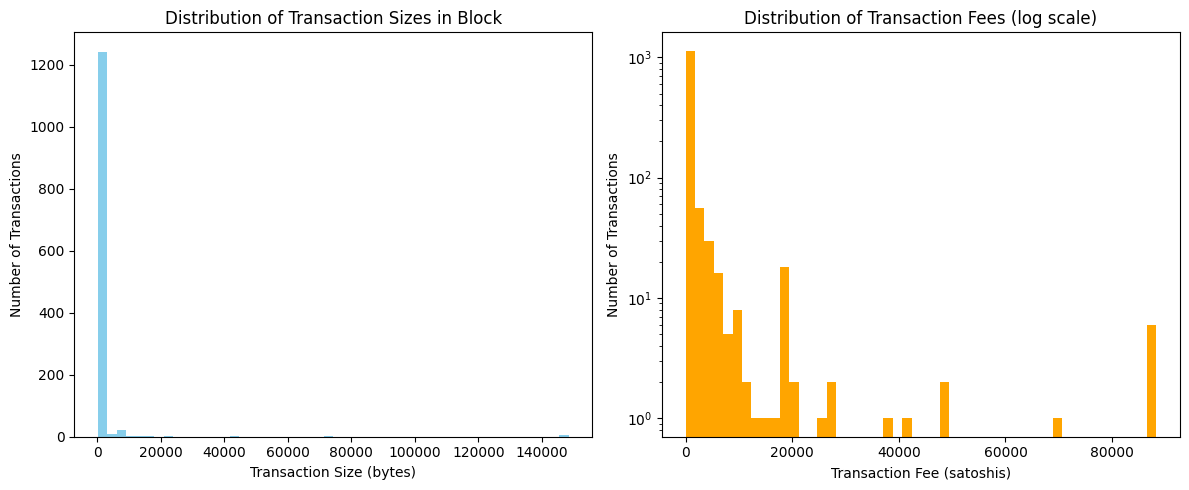

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Left plot
axes[0].hist(tx_df['size'], bins=50, color='skyblue')
axes[0].set_xlabel("Transaction Size (bytes)")
axes[0].set_ylabel("Number of Transactions")
axes[0].set_title("Distribution of Transaction Sizes in Block")

# Right plot (with log scale)
axes[1].hist(tx_df['fee'], bins=50, color='orange', log=True)
axes[1].set_xlabel("Transaction Fee (satoshis)")
axes[1].set_ylabel("Number of Transactions")
axes[1].set_title("Distribution of Transaction Fees (log scale)")

plt.tight_layout()
plt.show()

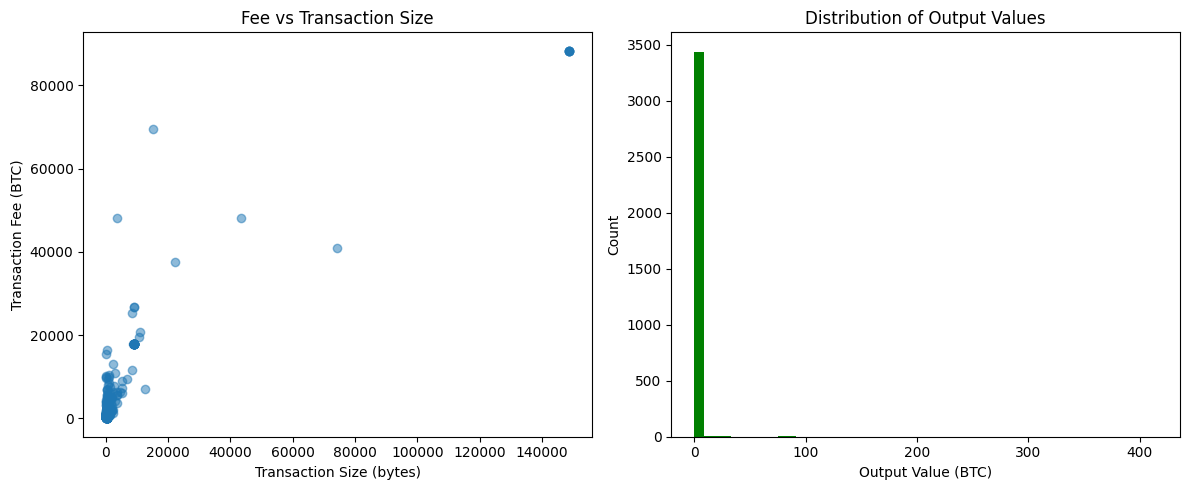

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


axes[0].scatter(tx_df['size'], tx_df['fee'], alpha=0.5)
axes[0].set_xlabel("Transaction Size (bytes)")
axes[0].set_ylabel("Transaction Fee (BTC)")
axes[0].set_title("Fee vs Transaction Size")

outputs['value_btc'] = outputs['out_value'] / 100_000_000

axes[1].hist(outputs['value_btc'], bins=50, color='green')
axes[1].set_xlabel("Output Value (BTC)")
axes[1].set_ylabel("Count")
axes[1].set_title("Distribution of Output Values")

plt.tight_layout()
plt.show()

# Top 10 Addresses By Total Output Value

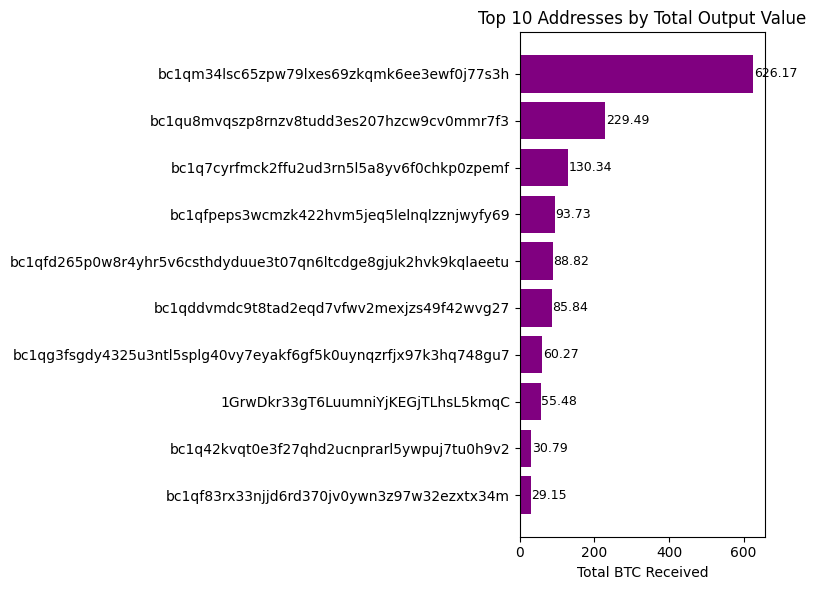

In [68]:
top_10 = addr_sums_btc.head(10).sort_values()  # Sort ascending for a cleaner horizontal plot

plt.figure(figsize=(8, 6))  # bigger figure size

plt.barh(top_10.index, top_10.values, color='purple')   # horizontal bar chart
plt.xlabel("Total BTC Received")
plt.title("Top 10 Addresses by Total Output Value")

# Add numeric labels next to each bar (optional):
for i, v in enumerate(top_10.values):
    plt.text(v + 1, i, f"{v:.2f}", va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Transaction Size Distribution and Transaction Fee Distribution

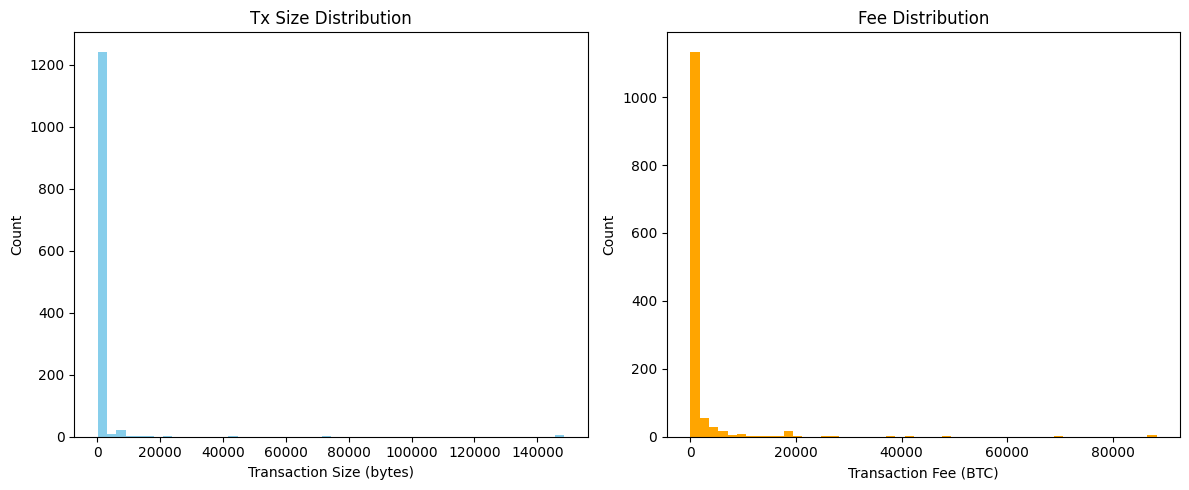

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Left subplot: transaction size distribution
axes[0].hist(tx_df['size'], bins=50, color='skyblue')
axes[0].set_xlabel("Transaction Size (bytes)")
axes[0].set_ylabel("Count")
axes[0].set_title("Tx Size Distribution")

# Right subplot: transaction fee distribution
axes[1].hist(tx_df['fee'], bins=50, color='orange')
axes[1].set_xlabel("Transaction Fee (BTC)")
axes[1].set_ylabel("Count")
axes[1].set_title("Fee Distribution")

plt.tight_layout()
plt.show()

# Transaction Fee Box Plot (Log Scale)

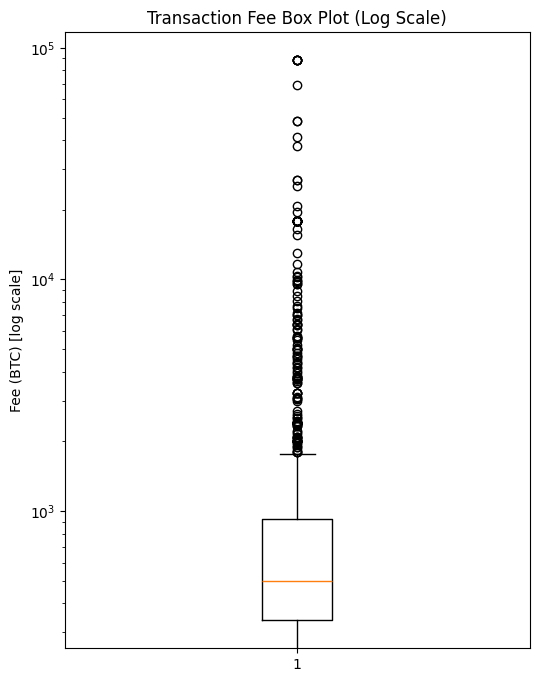

In [73]:
plt.figure(figsize=(6, 8))
plt.boxplot(tx_df['fee'], showfliers=True)  # or showfliers=False to hide outliers
plt.yscale('log')
plt.ylabel("Fee (BTC) [log scale]")
plt.title("Transaction Fee Box Plot (Log Scale)")
plt.show()

# Correlation Between Transaction Size and Fees

In [83]:
# Extract relevant columns as arrays
tx_sizes = tx_df['size'].values
tx_fees = tx_df['fee'].values

# 1. Pearson correlation (measures linear correlation)
pearson_corr, pearson_p = stats.pearsonr(tx_sizes, tx_fees)
print("Pearson correlation for size vs. fee:", pearson_corr)
print("P-value (Pearson):", pearson_p)

print()

# 2. Spearman correlation (rank-based, more robust to outliers)
spearman_corr, spearman_p = stats.spearmanr(tx_sizes, tx_fees)
print("Spearman correlation for size vs. fee:", spearman_corr)
print("P-value (Spearman):", spearman_p)

Pearson correlation for size vs. fee: 0.9002479273886635
P-value (Pearson): 0.0

Spearman correlation for size vs. fee: 0.5517128527999619
P-value (Spearman): 1.7666498729316292e-103


# Distribution Fitting

In [85]:
fees = tx_df['fee'].values

# Filter out zero-fee or negligible-fee transactions if you want
fees_filtered = fees[fees > 0]

In [87]:
shape, loc, scale = stats.lognorm.fit(fees_filtered, floc=0)
print("Lognormal fit parameters:")
print(" shape =", shape, ", loc =", loc, ", scale =", scale)

Lognormal fit parameters:
 shape = 1.0118941309763008 , loc = 0 , scale = 666.6759708220812


In [88]:
# Generate random samples from the fitted distribution for comparison
fitted_data = stats.lognorm.rvs(shape, loc=loc, scale=scale, size=len(fees_filtered))

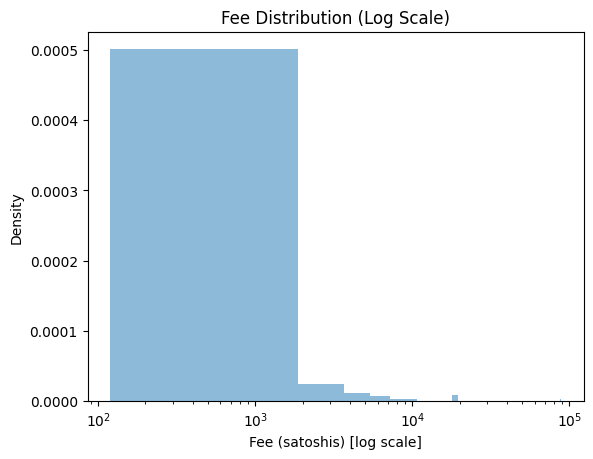

In [91]:
plt.hist(fees_filtered, bins=50, alpha=0.5, density=True)
plt.xscale('log')
plt.xlabel("Fee (satoshis) [log scale]")
plt.ylabel("Density")
plt.title("Fee Distribution (Log Scale)")
plt.show()

# Hypothesis Testing

In [92]:
# Suppose you categorize transactions into two groups:
# "Large" if size > some threshold (e.g. 500 bytes), else "Small"
threshold = 500
large_fees = tx_df.loc[tx_df['size'] > threshold, 'fee']
small_fees = tx_df.loc[tx_df['size'] <= threshold, 'fee']

In [93]:
# Use a non-parametric test like Mann-Whitney U if data are skewed
stat, p_value = stats.mannwhitneyu(large_fees, small_fees, alternative='two-sided')
print("Mann-Whitney U test statistic:", stat)
print("p-value:", p_value)

Mann-Whitney U test statistic: 202445.0
p-value: 2.78666343454922e-79


# Regression Analysis

In [96]:
slope, intercept, r_value, p_value, std_err = linregress(tx_df['size'], tx_df['fee'])
print("Linear Regression Results:")
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)
print("P-value:", p_value)
print("Std. error:", std_err)

Linear Regression Results:
Slope: 0.6231536202197162
Intercept: 1026.391533944111
R-squared: 0.8104463307675839
P-value: 0.0
Std. error: 0.008403856068733376


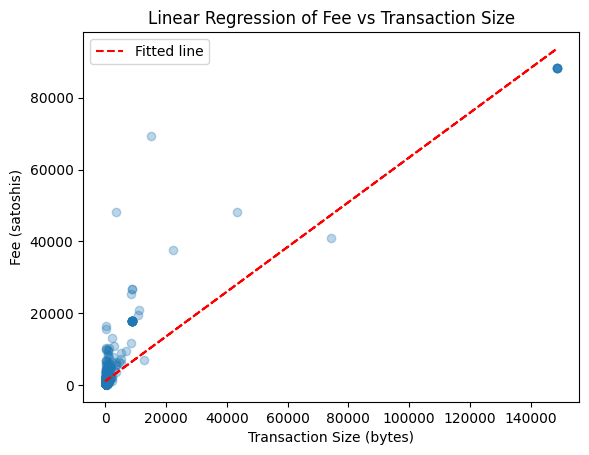

In [98]:
x = tx_df['size'].values
y = tx_df['fee'].values
y_pred = intercept + slope * x

plt.scatter(x, y, alpha=0.3)
plt.plot(x, y_pred, 'r--', label="Fitted line")
plt.xlabel("Transaction Size (bytes)")
plt.ylabel("Fee (satoshis)")
plt.title("Linear Regression of Fee vs Transaction Size")
plt.legend()
plt.show()

# Clustering or Outlier Detection

In [103]:
# Prepare data for clustering 
features = tx_df[['size', 'fee', 'vin_sz', 'vout_sz']].copy()
features = features[features['fee'] > 0] # Remove zero-fee or outliers if needed
scaled_features = zscore(features)

In [105]:
# Linkage
Z = linkage(scaled_features, method='ward')

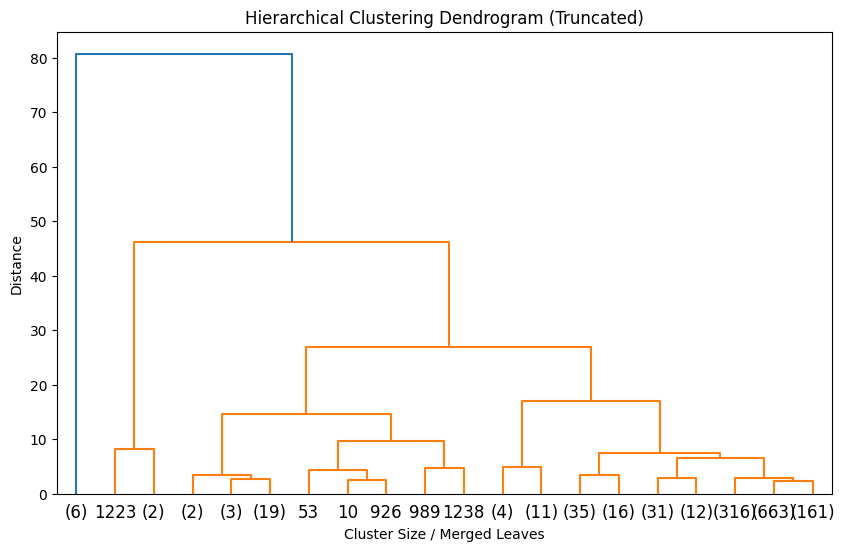

In [108]:
# Plot dendrogram (be cautious with large data sets though)
plt.figure(figsize=(10, 6))
dendrogram(
    Z, 
    truncate_mode='lastp',  # or 'level'
    p=20,                   # show only the last 20 merges
    show_leaf_counts=True,  # to show how many original points are in each leaf
)
plt.title("Hierarchical Clustering Dendrogram (Truncated)")
plt.xlabel("Cluster Size / Merged Leaves")
plt.ylabel("Distance")
plt.show()